In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import json
from pennylane import numpy as np

FILES_NAMES = {"simplified_2_design":{"fd":["simplified2design_1layers_fd","simplified2design_2layers_fd","simplified2design_3layers_fd","simplified2design_4layers_fd"], "ps":["simplified2design_1layers_ps","simplified2design_2layers_ps","simplified2design_3layers_ps","simplified2design_4layers_ps"]},
               "single_double":{"fd":["meta_simples_doubles_fd"], "ps":["meta_simples_doubles_ps"]},
               "double":{"fd":["meta_doubles_fd"], "ps":["meta_doubles_ps"]},
               "kupccgsd":{"fd":["kupccgsd_1layers_fd", "kupccgsd_2layers_fd"], "ps":["kupccgsd_1layers_ps", "kupccgsd_2layers_ps"]}}

DATA = {i:{"fd":[],"ps":[]} for i in FILES_NAMES}

with open('exp_runs_analytic/h2_fci.json', 'r') as reader:
    # Read & print the entire file
    data = reader.read()
    fci_h2 = json.loads(data)   

GRAD_METHOD_COMP = "fd" ## "fd" or "ps"

DICT_GRAD_METHOD = {"fd":"Finite Diff", "ps":"Parameter Shift"}


test_points=fci_h2["points"]
fci_energies = fci_h2["energies"]
    

<function matplotlib.pyplot.show(close=None, block=None)>

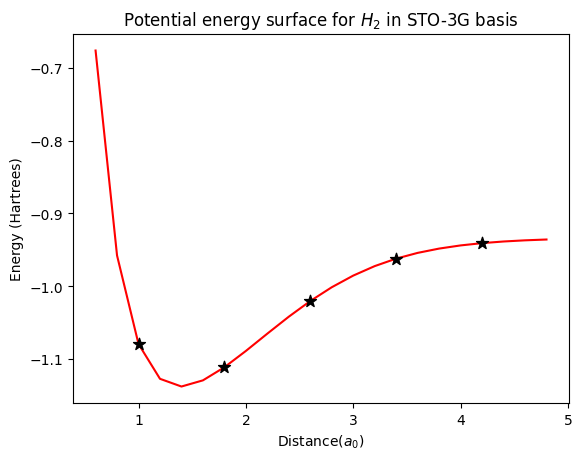

In [2]:
# Meta VQE description plot
train_points_indexes = [2,6,10,14,18]

plt.plot(test_points,fci_energies, color="r")
plt.scatter([test_points[i] for i in train_points_indexes], [fci_energies[i] for i in train_points_indexes], zorder=99, label="Train Points", marker='*', color="black", s=80)

plt.title('Potential energy surface for $H_{2}$ in STO-3G basis')
plt.ylabel('Energy (Hartrees)')
plt.xlabel('Distance($a_{0}$)')
plt.show

In [3]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [4]:
for ansatz in FILES_NAMES:
    for diff_method in FILES_NAMES[ansatz]:
        for file in FILES_NAMES[ansatz][diff_method]:

            with open(f'exp_runs_analytic/{file}.json', 'r') as reader:
                # Read & print the entire file
                data = reader.read()
                DATA[ansatz][diff_method].append(json.loads(data))


In [5]:
simplified_data_fd = DATA["simplified_2_design"]["fd"][3]["results"]
single_double_data_fd = DATA["single_double"]["fd"][0]["results"]
double_data_fd = DATA["double"]["fd"][0]["results"]
kupccgsd_data_fd = DATA["kupccgsd"]["fd"][0]["results"]


In [6]:
len(simplified_data_fd["adam"]["meta"]["energies"][-1])

201

<function matplotlib.pyplot.show(close=None, block=None)>

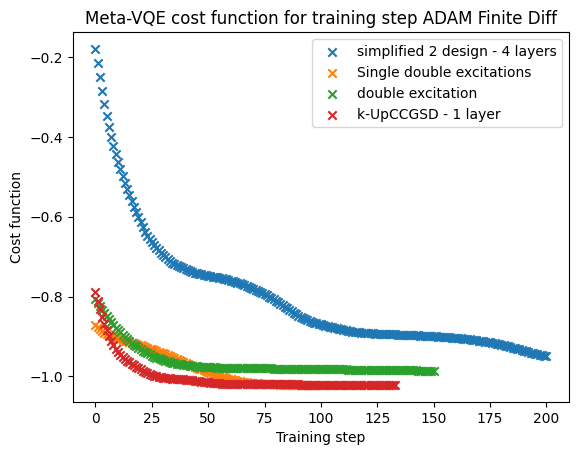

In [7]:
# Plot for meta energies


plt.scatter([i for i in range(len(simplified_data_fd["adam"]["meta"]["energies"][-1]))],simplified_data_fd["adam"]["meta"]["energies"][-1], label="simplified 2 design - 4 layers", marker='x')
plt.scatter([i for i in range(len(single_double_data_fd["adam"]["meta"]["energies"][-1]))],single_double_data_fd["adam"]["meta"]["energies"][-1], label="Single double excitations", marker='x')
plt.scatter([i for i in range(len(double_data_fd["adam"]["meta"]["energies"][-1]))],double_data_fd["adam"]["meta"]["energies"][-1], label="double excitation", marker='x')
plt.scatter([i for i in range(len(kupccgsd_data_fd["adam"]["meta"]["energies"][-1]))],kupccgsd_data_fd["adam"]["meta"]["energies"][-1], label="k-UpCCGSD - 1 layer", marker='x')

plt.legend()
plt.title('Meta-VQE cost function for training step ADAM Finite Diff')
plt.ylabel('Cost function')
plt.xlabel('Training step')
plt.show

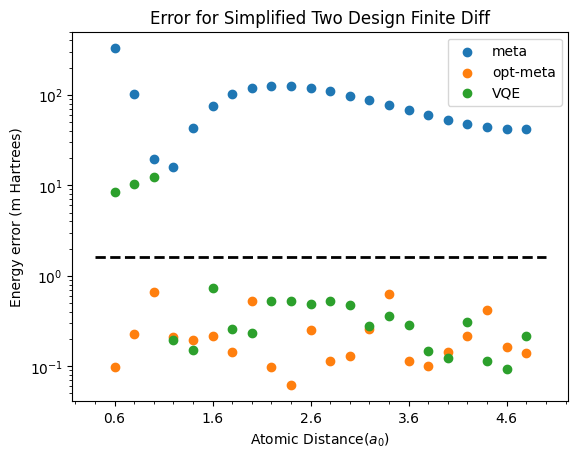

In [8]:
# Plot for errors
fig, ax = plt.subplots()

ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(simplified_data_fd["adam"]["meta"]["energies_after_meta"],fci_energies)], label="meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in simplified_data_fd["adam"]["opt_meta"]["energies"]],fci_energies)], label="opt-meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in simplified_data_fd["adam"]["vqe"]["energies"]],fci_energies)], label="VQE", marker='o')


ax.legend()
ax.set_title('Error for Simplified Two Design Finite Diff')
ax.set_yscale('log',base=10) 
ax.set_ylabel('Energy error (m Hartrees)')
ax.set_xlabel('Atomic Distance($a_{0}$)')
ax.set_ylim(top=5e2)

ax.hlines(y=1.6, xmin=test_points[0] -0.2, xmax=test_points[-1]+0.2, linestyles='--', linewidth=2, color='black')

ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_xticks(np.arange(min(test_points), max(test_points)+0.2, 1))


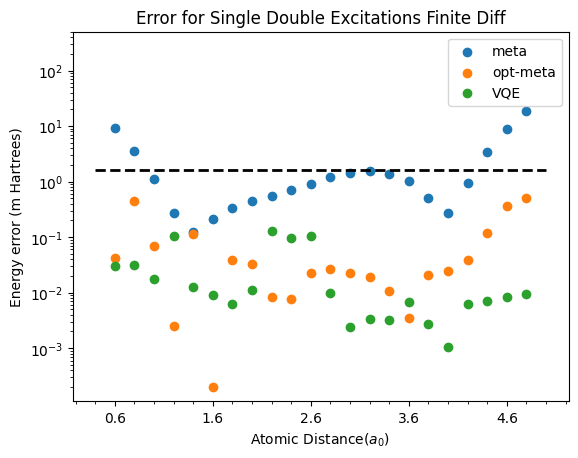

In [9]:
# Plot for errors
fig, ax = plt.subplots()

ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(single_double_data_fd["adam"]["meta"]["energies_after_meta"],fci_energies)], label="meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in single_double_data_fd["adam"]["opt_meta"]["energies"]],fci_energies)], label="opt-meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in single_double_data_fd["adam"]["vqe"]["energies"]],fci_energies)], label="VQE", marker='o')


ax.legend()
ax.set_title('Error for Single Double Excitations Finite Diff')
ax.set_yscale('log',base=10) 
ax.set_ylabel('Energy error (m Hartrees)')
ax.set_xlabel('Atomic Distance($a_{0}$)')
ax.set_ylim(top=5e2)

ax.hlines(y=1.6, xmin=test_points[0] -0.2, xmax=test_points[-1]+0.2, linestyles='--', linewidth=2, color='black')

ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_xticks(np.arange(min(test_points), max(test_points)+0.2, 1))


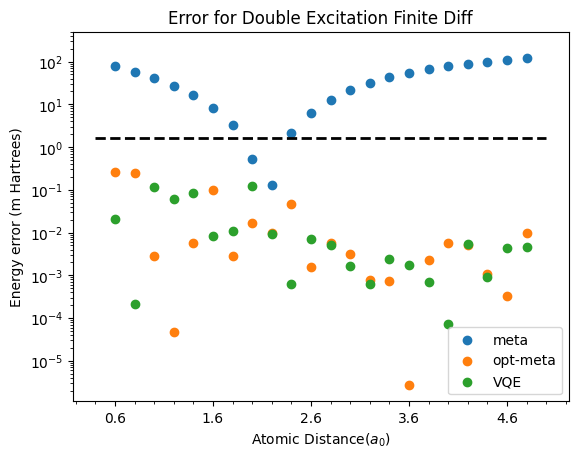

In [10]:
# Plot for errors
fig, ax = plt.subplots()

ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(double_data_fd["adam"]["meta"]["energies_after_meta"],fci_energies)], label="meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in double_data_fd["adam"]["opt_meta"]["energies"]],fci_energies)], label="opt-meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in double_data_fd["adam"]["vqe"]["energies"]],fci_energies)], label="VQE", marker='o')


ax.legend()
ax.set_title('Error for Double Excitation Finite Diff')
ax.set_yscale('log',base=10) 
ax.set_ylabel('Energy error (m Hartrees)')
ax.set_xlabel('Atomic Distance($a_{0}$)')
ax.set_ylim(top=5e2)

ax.hlines(y=1.6, xmin=test_points[0] -0.2, xmax=test_points[-1]+0.2, linestyles='--', linewidth=2, color='black')

ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_xticks(np.arange(min(test_points), max(test_points)+0.2, 1))


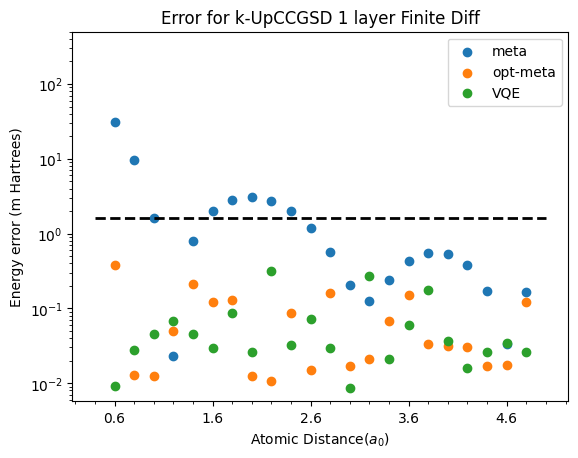

In [11]:
# Plot for errors
fig, ax = plt.subplots()

ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(kupccgsd_data_fd["adam"]["meta"]["energies_after_meta"],fci_energies)], label="meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in kupccgsd_data_fd["adam"]["opt_meta"]["energies"]],fci_energies)], label="opt-meta", marker='o')
ax.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip([energy[-1] for energy in kupccgsd_data_fd["adam"]["vqe"]["energies"]],fci_energies)], label="VQE", marker='o')


ax.legend()
ax.set_title('Error for k-UpCCGSD 1 layer Finite Diff')
ax.set_yscale('log',base=10) 
ax.set_ylabel('Energy error (m Hartrees)')
ax.set_xlabel('Atomic Distance($a_{0}$)')
ax.set_ylim(top=5e2)

ax.hlines(y=1.6, xmin=test_points[0] -0.2, xmax=test_points[-1]+0.2, linestyles='--', linewidth=2, color='black')

ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_xticks(np.arange(min(test_points), max(test_points)+0.2, 1))


In [12]:
s2d_runs_vqe_fd = simplified_data_fd["adam"]["vqe"]["runs_per_step"]
single_double_runs_vqe_fd = single_double_data_fd["adam"]["vqe"]["runs_per_step"]
single_runs_vqe_fd = double_data_fd["adam"]["vqe"]["runs_per_step"]
kupccgsd_runs_vqe_fd = kupccgsd_data_fd["adam"]["vqe"]["runs_per_step"]

s2d_runs_opt_meta_fd = simplified_data_fd["adam"]["opt_meta"]["runs_per_step"]
single_double_runs_opt_meta_fd = single_double_data_fd["adam"]["opt_meta"]["runs_per_step"]
single_runs_opt_meta_fd = double_data_fd["adam"]["opt_meta"]["runs_per_step"]
kupccgsd_runs_opt_meta_fd = kupccgsd_data_fd["adam"]["opt_meta"]["runs_per_step"]

s2d_runs_meta_fd = simplified_data_fd["adam"]["meta"]["runs"]
single_double_runs_meta_fd = single_double_data_fd["adam"]["meta"]["runs"]
single_runs_meta_fd = double_data_fd["adam"]["meta"]["runs"]
kupccgsd_runs_meta_fd = kupccgsd_data_fd["adam"]["meta"]["runs"]

[116000, 25480, 15000, 34580]


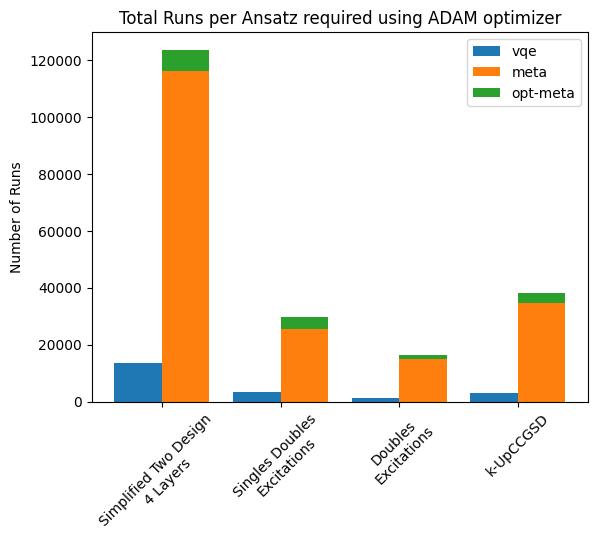

In [13]:
# Ploting number of runs
# 29,4,13


fig, ax = plt.subplots()

vqe_data = [29*s2d_runs_vqe_fd, 13*single_double_runs_vqe_fd, 5*single_runs_vqe_fd, 13*kupccgsd_runs_vqe_fd]
opt_meta_data = [29*s2d_runs_opt_meta_fd, 13*single_double_runs_opt_meta_fd, 5*single_runs_opt_meta_fd, 13*kupccgsd_runs_opt_meta_fd]

meta_runs = [20*29*s2d_runs_meta_fd, 20*13*single_double_runs_meta_fd, 20*5*single_runs_meta_fd, 20*13*kupccgsd_runs_meta_fd]

print(meta_runs)

vqe_data_joined = [np.sum(data) for data in vqe_data]
opt_meta_data_joined = [np.sum(data) for data in opt_meta_data]

ind = np.arange(len(vqe_data_joined)) 

width = 0.4                      # the width of the bars

ax.set_ylabel('Number of Runs')
ax.set_title('Total Runs per Ansatz required using ADAM optimizer')
xTickMarks = ["Simplified Two Design\n4 Layers", "Singles Doubles\nExcitations", "Doubles\nExcitations", "k-UpCCGSD"]
ax.set_xticks(ind+(width/2))
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)


plt.bar(np.arange(len(vqe_data_joined)), vqe_data_joined, width=width, label = "vqe")
plt.bar(np.arange(len(meta_runs))+ width, meta_runs, width=width, label="meta")
plt.bar(np.arange(len(opt_meta_data_joined))+ width, opt_meta_data_joined, width=width, bottom= meta_runs, label="opt-meta")
ax.legend()
plt.show()

In [14]:
s2d_runs_vqe_fd = simplified_data_fd["demon_adam"]["vqe"]["runs_per_step"]
single_double_runs_vqe_fd = single_double_data_fd["demon_adam"]["vqe"]["runs_per_step"]
single_runs_vqe_fd = double_data_fd["demon_adam"]["vqe"]["runs_per_step"]
kupccgsd_runs_vqe_fd = kupccgsd_data_fd["demon_adam"]["vqe"]["runs_per_step"]

s2d_runs_opt_meta_fd = simplified_data_fd["demon_adam"]["opt_meta"]["runs_per_step"]
single_double_runs_opt_meta_fd = single_double_data_fd["demon_adam"]["opt_meta"]["runs_per_step"]
single_runs_opt_meta_fd = double_data_fd["demon_adam"]["opt_meta"]["runs_per_step"]
kupccgsd_runs_opt_meta_fd = kupccgsd_data_fd["demon_adam"]["opt_meta"]["runs_per_step"]

s2d_runs_meta_fd = simplified_data_fd["demon_adam"]["meta"]["runs"]
single_double_runs_meta_fd = single_double_data_fd["demon_adam"]["meta"]["runs"]
single_runs_meta_fd = double_data_fd["demon_adam"]["meta"]["runs"]
kupccgsd_runs_meta_fd = kupccgsd_data_fd["demon_adam"]["meta"]["runs"]

[106720, 35100, 14500, 19500]


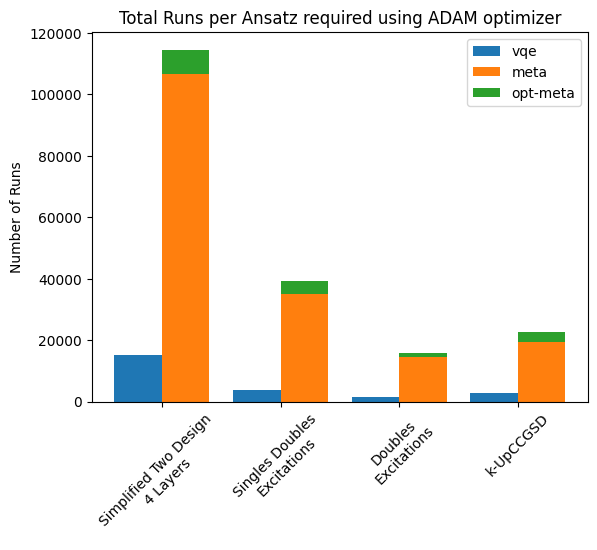

In [15]:
# Ploting number of runs
# 29,4,13


fig, ax = plt.subplots()

vqe_data = [29*s2d_runs_vqe_fd, 13*single_double_runs_vqe_fd, 5*single_runs_vqe_fd, 13*kupccgsd_runs_vqe_fd]
opt_meta_data = [29*s2d_runs_opt_meta_fd, 13*single_double_runs_opt_meta_fd, 5*single_runs_opt_meta_fd, 13*kupccgsd_runs_opt_meta_fd]

meta_runs = [20*29*s2d_runs_meta_fd, 20*13*single_double_runs_meta_fd, 20*5*single_runs_meta_fd, 20*13*kupccgsd_runs_meta_fd]

print(meta_runs)

vqe_data_joined = [np.sum(data) for data in vqe_data]
opt_meta_data_joined = [np.sum(data) for data in opt_meta_data]

ind = np.arange(len(vqe_data_joined)) 

width = 0.4                      # the width of the bars

ax.set_ylabel('Number of Runs')
ax.set_title('Total Runs per Ansatz required using ADAM optimizer')
xTickMarks = ["Simplified Two Design\n4 Layers", "Singles Doubles\nExcitations", "Doubles\nExcitations", "k-UpCCGSD"]
ax.set_xticks(ind+(width/2))
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)


plt.bar(np.arange(len(vqe_data_joined)), vqe_data_joined, width=width, label = "vqe")
plt.bar(np.arange(len(meta_runs))+ width, meta_runs, width=width, label="meta")
plt.bar(np.arange(len(opt_meta_data_joined))+ width, opt_meta_data_joined, width=width, bottom= meta_runs, label="opt-meta")
ax.legend()
plt.show()

In [16]:
# Calculate RMSE

from sklearn.metrics import mean_squared_error

mean_squared_error(fci_energies, kupccgsd_data_fd["adam"]["meta"]["energies_after_meta"], squared=False) 

0.007075523750991031

In [17]:
rmse_all = {i:{"fd":{},"ps":{}} for i in FILES_NAMES}

optimizers = ["gradient_descent", "spsa", "adam", "demon_adam"]

for ansatz in FILES_NAMES:
    for diff_method in FILES_NAMES[ansatz]:
        for count,file in enumerate(FILES_NAMES[ansatz][diff_method]):
            rmse_all[ansatz][diff_method][file]={}
            for opt in optimizers:
                errors = [] ## meta, opt-meta, vqe
                
                errors.append(mean_squared_error(fci_energies, [energy[-1] for energy in DATA[ansatz][diff_method][count]["results"][opt]["vqe"]["energies"]], squared=False))
                errors.append(mean_squared_error(fci_energies, DATA[ansatz][diff_method][count]["results"][opt]["meta"]["energies_after_meta"], squared=False))
                errors.append(mean_squared_error(fci_energies, [energy[-1] for energy in DATA[ansatz][diff_method][count]["results"][opt]["opt_meta"]["energies"]], squared=False))
                                
                rmse_all[ansatz][diff_method][file][opt] = errors


In [18]:
rows_names = []
rows_table={}
for key in rmse_all:
    for diff_method in rmse_all[key]:
        for count,file in enumerate(rmse_all[key][diff_method]): 
            print(f'{key}_{count}')
            key_name = f'{key}_{count}'
            if key_name not in rows_table:
                rows_table[key_name]=[]
            rows_names.append(key_name)
            for opt in optimizers:
                rows_table[key_name].extend(rmse_all[key][diff_method][file][opt]) 



simplified_2_design_0
simplified_2_design_1
simplified_2_design_2
simplified_2_design_3
simplified_2_design_0
simplified_2_design_1
simplified_2_design_2
simplified_2_design_3
single_double_0
single_double_0
double_0
double_0
kupccgsd_0
kupccgsd_1
kupccgsd_0
kupccgsd_1


In [19]:
np.transpose(np.reshape(rows_table["simplified_2_design_0"],(8,3)))

tensor([[0.12404942, 0.31782315, 0.05082938, 0.04287024, 0.12404943,
         0.20796886, 0.0428194 , 0.04671017],
        [0.09383229, 0.62726828, 0.09254165, 0.07848332, 0.09383229,
         0.62726828, 0.09254165, 0.08037013],
        [0.04329135, 0.06721922, 0.04132789, 0.04134234, 0.04325893,
         0.06865884, 0.04132129, 0.041346  ]], requires_grad=True)

In [20]:
index_order = [0,4,1,5,2,6,3,7]

to_table =[]

for key in rows_table:
    print(key, len(rows_table[key]))
    entry = np.transpose(np.reshape(rows_table[key],(8,3)))
    for i in entry:
        to_table.append(i[index_order])

to_display = np.reshape(to_table,(len(to_table),8))


simplified_2_design_0 24
simplified_2_design_1 24
simplified_2_design_2 24
simplified_2_design_3 24
single_double_0 24
double_0 24
kupccgsd_0 24
kupccgsd_1 24


In [21]:
import pandas as pd

result_types = ['vqe', 'meta', 'opt-meta']
arrays = []
for key in rows_table:
    for result_type in result_types:
        arrays.append((key.replace('_', '-'), result_type))


In [22]:
columns = [('Gradient','fd'),('Gradient','ps'),('SPSA','fd'),('SPSA','ps'),('ADAM','fd'),('ADAM','ps'),('DEMON ADAM','fd'),('DEMON ADAM','ps')]

In [23]:
df = pd.DataFrame(to_display, index=arrays, columns = columns)
df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index = pd.MultiIndex.from_tuples(df.index)
pd.options.display.float_format = '{:12.3e}'.format
df

Gradient                      SPSA   
                                         fd           ps           fd   
simplified-2-design-0 vqe         1.240e-01    1.240e-01    3.178e-01  \
                      meta        9.383e-02    9.383e-02    6.273e-01   
                      opt-meta    4.329e-02    4.326e-02    6.722e-02   
simplified-2-design-1 vqe         2.655e-03    2.655e-03    4.630e-01   
                      meta        2.590e-01    2.590e-01    5.252e-01   
                      opt-meta    4.230e-02    4.242e-02    7.263e-02   
simplified-2-design-2 vqe         3.287e-02    3.287e-02    1.378e-01   
                      meta        1.027e-01    1.027e-01    8.588e-01   
                      opt-meta    8.532e-04    8.532e-04    4.408e-03   
simplified-2-design-3 vqe         2.015e-03    2.015e-03    1.150e-01   
                      meta        1.010e-01    1.010e-01    5.629e-01   
                      opt-meta    2.742e-04    2.746e-04    3.200e-03   
single-double-0       vqe         1.227e-04    1.227e-04    3.201e-03   
                      meta        2.993e-02    2.993e-02    1.466e-01   
                      opt-meta    1.626e-04    1.626e-04    2.306e-03   
double-0              vqe         1.217e-04    1.217e-04    7.347e-04   
                      meta        6.752e-02    6.752e-02    1.171e-01   
                      opt-meta    1.135e-04    1.135e-04    9.279e-04   
kupccgsd-0            vqe         5.582e-05    5.582e-05    3.546e-02   
                      meta        1.473e-02    1.473e-02    6.526e-02   
                      opt-meta    5.456e-05    5.456e-05    1.344e-03   
kupccgsd-1            vqe         6.845e-05    6.845e-05    1.676e-02   
                      meta        1.741e-02    1.741e-02    9.520e-02   
                      opt-meta    3.501e-04    3.501e-04    2.325e-03   

                                                    ADAM                
                                         ps           fd           ps   
simplified-2-design-0 vqe         2.080e-01    5.083e-02    4.282e-02  \
                      meta        6.273e-01    9.254e-02    9.254e-02   
                      opt-meta    6.866e-02    4.133e-02    4.132e-02   
simplified-2-design-1 vqe         3.345e-01    1.109e-02    4.283e-02   
                      meta        5.252e-01    6.611e-02    6.611e-02   
                      opt-meta    5.626e-02    4.127e-02    4.118e-02   
simplified-2-design-2 vqe         1.378e-01    1.820e-03    1.820e-03   
                      meta        8.588e-01    6.521e-03    6.521e-03   
                      opt-meta    4.408e-03    1.040e-03    1.040e-03   
simplified-2-design-3 vqe         1.143e-01    3.884e-03    3.884e-03   
                      meta        5.629e-01    1.066e-01    1.066e-01   
                      opt-meta    3.266e-03    2.864e-04    3.324e-04   
single-double-0       vqe         3.201e-03    4.862e-05    4.862e-05   
                      meta        1.466e-01    5.015e-03    5.015e-03   
                      opt-meta    2.306e-03    1.706e-04    1.707e-04   
double-0              vqe         7.347e-04    4.369e-05    4.369e-05   
                      meta        1.171e-01    5.775e-02    5.775e-02   
                      opt-meta    9.279e-04    8.011e-05    8.011e-05   
kupccgsd-0            vqe         3.546e-02    1.036e-04    1.036e-04   
                      meta        6.526e-02    7.076e-03    7.076e-03   
                      opt-meta    1.344e-03    1.182e-04    1.182e-04   
kupccgsd-1            vqe         1.676e-02    1.522e-04    1.522e-04   
                      meta        9.520e-02    6.096e-03    6.096e-03   
                      opt-meta    2.325e-03    3.550e-04    3.550e-04   

                                 DEMON ADAM               
                                         fd           ps  
simplified-2-design-0 vqe         4.287e-02    4.671e-02  
                      meta        7.848e-02    8.037e-02  
 

In [24]:
print(df.to_latex(float_format="{:.3e}".format))

\begin{tabular}{llrrrrrrrr}
\toprule
 &  & \multicolumn{2}{r}{Gradient} & \multicolumn{2}{r}{SPSA} & \multicolumn{2}{r}{ADAM} & \multicolumn{2}{r}{DEMON ADAM} \\
 &  & fd & ps & fd & ps & fd & ps & fd & ps \\
\midrule
\multirow[t]{3}{*}{simplified-2-design-0} & vqe & 1.240e-01 & 1.240e-01 & 3.178e-01 & 2.080e-01 & 5.083e-02 & 4.282e-02 & 4.287e-02 & 4.671e-02 \\
 & meta & 9.383e-02 & 9.383e-02 & 6.273e-01 & 6.273e-01 & 9.254e-02 & 9.254e-02 & 7.848e-02 & 8.037e-02 \\
 & opt-meta & 4.329e-02 & 4.326e-02 & 6.722e-02 & 6.866e-02 & 4.133e-02 & 4.132e-02 & 4.134e-02 & 4.135e-02 \\
\cline{1-10}
\multirow[t]{3}{*}{simplified-2-design-1} & vqe & 2.655e-03 & 2.655e-03 & 4.630e-01 & 3.345e-01 & 1.109e-02 & 4.283e-02 & 8.698e-03 & 2.679e-03 \\
 & meta & 2.590e-01 & 2.590e-01 & 5.252e-01 & 5.252e-01 & 6.611e-02 & 6.611e-02 & 7.823e-02 & 6.665e-02 \\
 & opt-meta & 4.230e-02 & 4.242e-02 & 7.263e-02 & 5.626e-02 & 4.127e-02 & 4.118e-02 & 4.126e-02 & 4.123e-02 \\
\cline{1-10}
\multirow[t]{3}{*}{simplif

In [25]:
meta_cost = {i:{"fd":{},"ps":{}} for i in FILES_NAMES}

optimizers = ["gradient_descent", "spsa", "adam", "demon_adam"]

for ansatz in FILES_NAMES:
    for diff_method in FILES_NAMES[ansatz]:
        for count,file in enumerate(FILES_NAMES[ansatz][diff_method]):
            meta_cost[ansatz][diff_method][file]={}
            for opt in optimizers:                                
                meta_cost[ansatz][diff_method][file][opt] = [DATA[ansatz][diff_method][count]["results"][opt]["meta"]["energies"][0][-1]]